# Exercise 1: identify the contour of the maple leaf
set by Hao-Chun Hsu<p>
Write a script to identify the contour of the maple leaf in image ‘Maple.jpg’. The program should be able to exclude the petiole from the contour. Draw the contour on top of the maple leaf in the image. Please also calculate the ratio of leaf contour and leaf area.

In [1]:
import cv2
import PIL.Image
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
from IPython.display import clear_output, Image, display

## The function to display numpy-array images

In [2]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

## Read the image

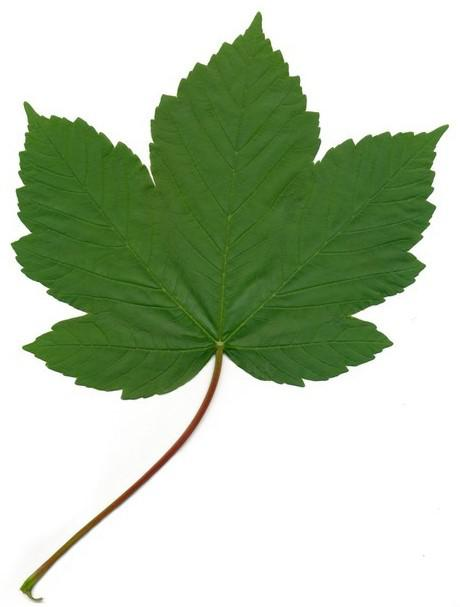

(607, 460, 3)


In [3]:
img = cv2.imread("Maple.jpg")
showarray(img[:,:,::-1]) # note that bgr image need to be transformed to rgb
print(img.shape)

## Convert the image to a binary image based on threshold
### Convert the BGR-image to a grayscale image

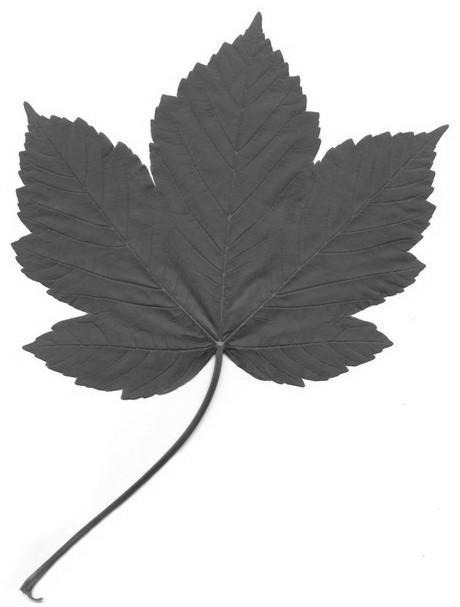

(607, 460)


In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
showarray(gray_img)
print(gray_img.shape)

### Use Otsu's method to determine the threshold and convert the image

169.0


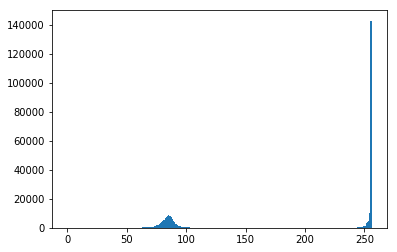

In [5]:
_ = plt.hist(gray_img.ravel(), 256, [0,256])
ret, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret)

## Complement the binary image

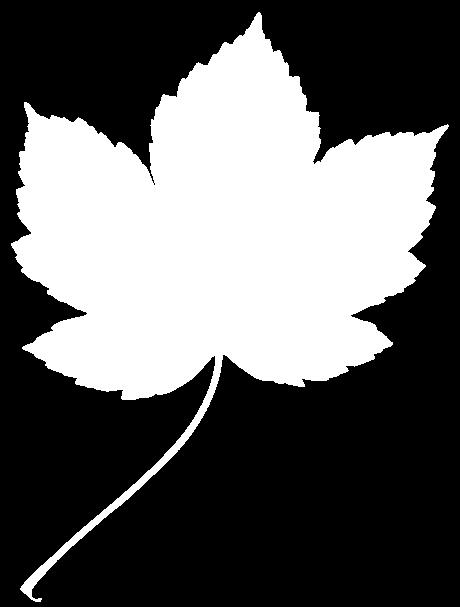

In [6]:
#showarray(thresh)
compleBW = 255 - thresh
showarray(compleBW)

## Exclude the petiole by image opening

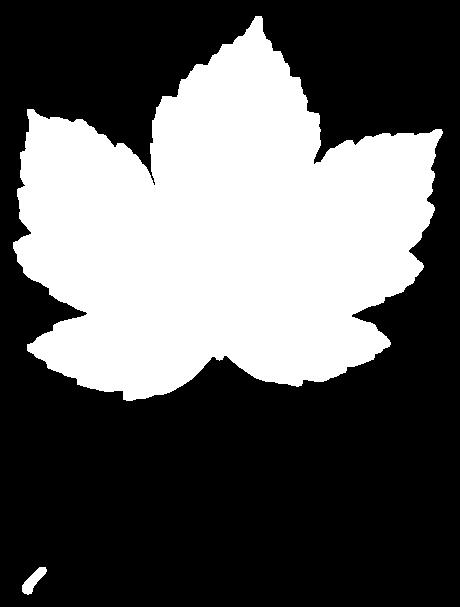

In [7]:
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(8, 8)) # structuring element
opening = cv2.morphologyEx(compleBW, cv2.MORPH_OPEN, kernel=se)
showarray(opening)

## Remove the remaining part of the petiole

In [8]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(opening, connectivity=8, ltype=cv2.CV_32S)
print("x, y, width, height, area")
print(stats)

x, y, width, height, area
[[     0      0    460    607 175134]
 [    13     16    430    385 103770]
 [    22    567     25     28    316]]


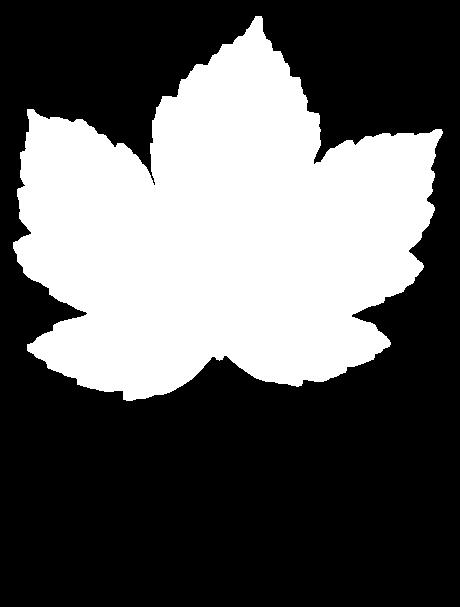

In [9]:
opening[labels==2] = 0
showarray(opening)

## Identify the contour and draw it on top of the leaf in the image

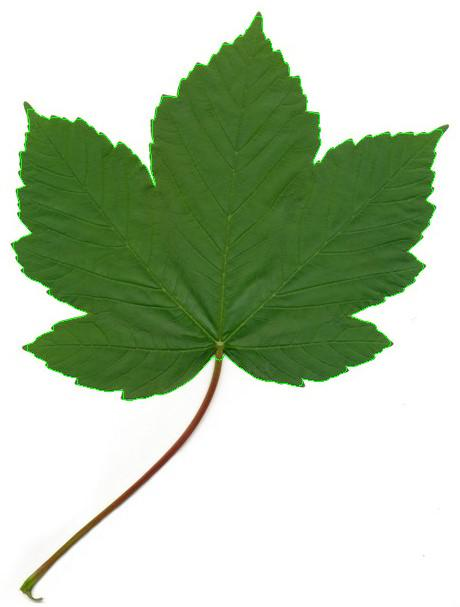

True

In [10]:
_, contours, hierarchy = cv2.findContours(image=opening, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
img_contour = img.copy()
_ = cv2.drawContours(image=img_contour, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=1)
showarray(img_contour[:,:,::-1])
cv2.imwrite("Maple_with_contour.jpg", img_contour)

## Calculate the ratio of leaf contour and area

In [11]:
area = opening.sum()
length = contours[0].shape[0]
print(f"Area: {area}")
print(f"Contour length: {length}")
print(f"length-area ratio: {length/area}")

Area: 26461350
Contour length: 1692
length-area ratio: 6.394231586823801e-05
